# Unity ML Agents - Navigation 

## Objective

In this project, we used Deep Q Network to solve the navigation problem of collecting Bananas from a large square world. The environment is considered solved when the agent is able to collect an average score of +13 over 100 consecutive episodes

--- 

## Learning Algorithm

The agent uses the approach proposed by Deep Q Network [paper](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf). The key ideas used from the  are :

**Neural Network**: A neural network will all fully connected layers is used to learn the state to action mapping.

**Fixed Target Network**: The agent makes use of two neural networks 
  * Learner network: for learning the optimal set of weights to map state to action. Action = $\begin{align} \hat{Q} \, (S', a, w) \end{align} $
  * Fixed Q-Target network: acts as replacement for optimal $\begin{align} Q_{\pi}(S,A) \end{align}$. The fixed target network is parameterized by fixed set of weights during a learning step. This helps stabilize the Q learning.

The Q target is defined as $\begin{align} Reward + \gamma \, max_{a} \, \hat{Q} \, (S', a, w^{-}) \end{align} $ if episode doesn't terminate at next step else only used Reward. 
  
  
The learner network then uses mean squared error, where *error* is the difference between **expected** (Q target) - **predicted** (output of learner network), as loss to guide the optimizer to update weights. We call this a learning step, and after each learning step the weights of fixed target networks are updated with a copy of weights from the learner network

**Experience Replay Buffer**: We use a finite memory to store the experience (state, action, reward, next_state) and learn from it during the training phase. The experiences used for training are sampled uniformly at random to break the correlation between subsequent state-action pairs.

### Steps

`Initialize replay memory to a fixed capacity`

`Initialize learner network with random weights`

`Initial target network with a copy of learner network weights`

`For episode = 1, M do`

    Reset environment state from environment   
    
    While not done    
    
        With proability epsilon select a random action 
        else ask learner network to propose the action and select the one with maximum q-value
        
        execute the action in environment and get next_state, reward and done
        
        add state, action, reward, next_state, done into agent's memory as experience
        
        perform a learning step on learner network if it has collected enough experiences
            
        learning step includes 
            sample uniformly at random from experience, 
            calculate loss (as explained above), 
            perform gradient descent step 
            update fixed target network with learner network weights
        
        update state to next_state
    End While
`End For`

---

## Network Achitecture

We use fully connected neural network with 2 hidden layers. The number of neurons in input layer is same as state size (37) and output layer has 4 neurons (same as action size). The hidden layers use 64 and 32 neurons.

<img src="images/dqn_nn.png" width=300 height=300 />


## Hyperparameters

|Hyperparameter|Value|Description|
|--------------:|----:|:-----------|
|minibatch size| 64 | Number of training examples to sample from memory|
|replay memory size|100000|Number of experiences to store in memory|
|discount factor|0.90|Discount factor of gamma used in Q-learning update|
|update frequency|4|how ofter to update network weights|
|target network update frequency|4|how ofter to update target network weights|
|learning rate|0.0001|The learning rate used by Adam|
|tau|0.0005|The parameters used by soft update of target network weights|
|training episodes|3000|Number of episodes used for training|
|starting epsilon|1.0|Starting epsilon used by eps-greedy policy|
|epsilon decay|0.99|Decay rate of epsilon|
|minimum epsilon|0.1|Minimum value of epsilon|

## Agent Performance

In this section, we will compare the DQN agent's performance against a random player.

In [1]:
import sys
sys.path.insert(0, 'src/')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('Solarize_Light2')

%load_ext autoreload
%autoreload 2

from player import Player

In [2]:
# Initialize and run the best player
player = Player()
scores, best_score = player.play()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Progress: 90/100, avg score: 17.80

In [22]:
'DQN Average score in 100 episodes: {}'.format(np.mean(scores))

'DQN Average score in 100 episodes: 17.36'

In [23]:
# Get the scores from random player (takes random actions)
rand_scores, rand_best_score = player.play_random()

Progress: 90/100, avg score: -0.10

In [26]:
'Random Player Average score in 100 episodes: {}'.format(np.mean(rand_scores))

'Random Player Average score in 100 episodes: -0.02'

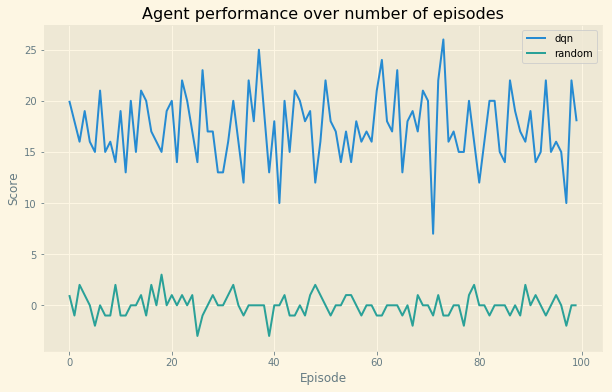

In [28]:
# Compare the performance of dqn agent with random agent

plt.figure(figsize=(10,6))
plt.plot(range(len(scores)), scores, label='dqn')
plt.plot(range(len(scores)), rand_scores, label='random')

plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.title('Agent performance over number of episodes')
plt.show()

--- 

## Future Work

The current implementation is based on the ideas from vanilla DQN whereas the extensions such as Double DQN, Prioritized experience replay and Duelling DQN have shown to outperform vanilla DQN in Atari games. 

I consider the current implementation as baseline for future experiments with following :

**Double DQN**: Q leaning is prone to the problem of over estimating Q values. During initial training phases, the fixed Q network would most likely make mistakes if it hasn't seen enough states. The solution is to use one network for choosing the best action and another for getting the Q value of action chosen. Since we already use two separate networks, learner and fixed network, we could use learner network to choose the action and fixed network to get the Q value and compare its performance to baseline implmenetation.

**Prioritized experience replay**: currently, we do not factor the fact that some experience may be more useful than others and agent might be able to learn from from it. Using this approach, the agent might 

**DQN Pixels**: Learn directly from pixels instead of using state vector provided by the environment. The original DQN paper uses frames and CNN to come up with the appropriate action. It should be interesting to compare the performance with baseline.